**Introductory Examples**

[Quant Econ](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)

May 13th 2020

Taisei Noda

# Example: Plotting a White Noise Process

## Introduction to Packages

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


In [2]:
using LinearAlgebra, Statistics

## Using Functions from a Package

In [3]:
randn()

-1.8853847934045622

**Note: Do not confuse with "plots". "P" must be capital.**

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with GR
└ Loading UUIDs into GR from project dependency, future warnings for GR are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71] failed to load from a cache file.")
└ @ Base loading.jl:1041
┌ Info: Precompiling GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency b

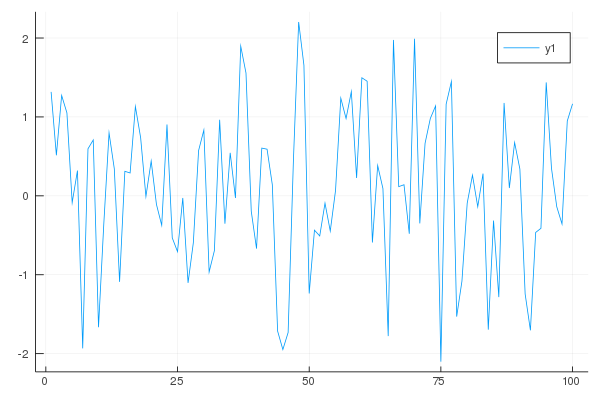

In [4]:
using Plots
gr(fmt=:png);

n=100
ϵ=randn(n)
plot(1:n, ϵ)

## Arrays

In [5]:
typeof(ϵ)

Array{Float64,1}

In [6]:
ϵ[1:5]

5-element Array{Float64,1}:
  1.3175035701368298
  0.513539117471616
  1.2722758150921836
  1.0513576595842318
 -0.0862452389038757

In [7]:
?typeof

search: typeof typejoin TypeError



```
typeof(x)
```

Get the concrete type of `x`.

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Array{Float64,2}
```


## For Loops

In [8]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

This is very indirect as the connection between the index "i" and the $\epsilon$ vector is unclear. "**eachindex**" returns an iterator of indices.

In [9]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i]=randn()
end
typeof(ϵ)
ϵ[1:5]


5-element Array{Float64,1}:
  0.585708703112706
  1.772274095976755
  0.8375051978464846
 -1.7441677780618166
 -1.957710517228011

In [10]:
ϵ_sum = 0.0 # careful to use 0.0, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum=ϵ_sum+ϵ_val
end
ϵ_mean=ϵ_sum/m

-0.10127805967077634

To test equality, use $\approx$ rathaer than ==

In [11]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m])/m

true

## User-Defined Functions

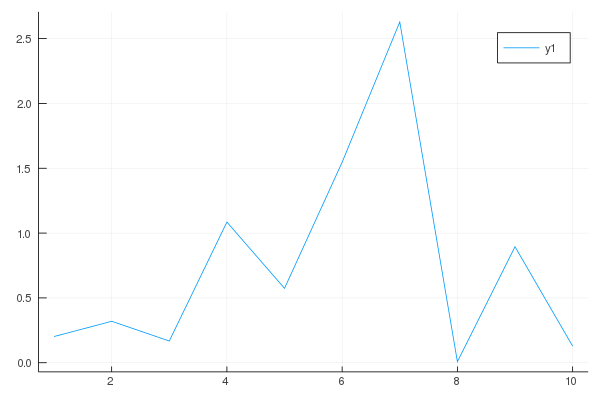

In [12]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end

data = generatedata(10)
plot(data)

**"Function" and "return" are keywords.**

Notice this code is unnecessarily long.

In [13]:
# still poor style
function generatedata(n)
    ϵ=randn(n)
    
    for i in eachindex(ϵ)
        ϵ[i]=ϵ[i]^2
    end
    
    return ϵ
end
data=generatedata(5)

5-element Array{Float64,1}:
 0.016052759003087242
 0.06214509363347946
 0.850282839584814
 2.4939575672706518
 0.0070654696819876335

Note: The looping over the i index to square the results is difficult to read.

In [14]:
# better style
function generatedata(n)
    ϵ=randn(n)
    return ϵ.^2
end
data = generatedata(5)

5-element Array{Float64,1}:
 0.004387229686320048
 2.1082962056778745
 0.003152570564839621
 0.9473588941202465
 0.524202102998345

Note: This is much clearer, but we can drop the "function".

In [15]:
# good style
generatedata(n)=randn(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 0.737158670580627
 1.4376550029025166
 0.09508010390617667
 0.000352330580618209
 0.11829791196694553

* More general way

In [16]:
# good style
f(x)=x^2 # simple square function
generatedata(n)=f.(randn(n)) # uses broadcast for some function `f`
data = generatedata(5)

5-element Array{Float64,1}:
 0.21363768911549808
 0.2581882033280218
 0.8270748003731517
 0.004129610244126795
 0.4700937821769384

* Best Practice

In [17]:
generatedata(n,gen)=gen.(randn(n)) # uses broadcast for some function `gen`

f(x) = x^2 # simple square function
data = generatedata(5,f)

5-element Array{Float64,1}:
 0.051466895140177014
 0.03092653414319853
 0.076472950413579
 0.1599713090746075
 0.4526916484190441

**Note: Passing in a function f.** 

Although the code is not the shortest, this way is more general and Julia enables us to use these techniques with no performance overhead.

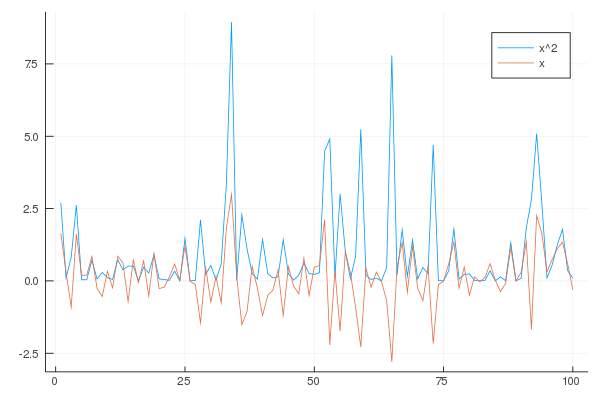

In [18]:
# direct solution with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x= randn(n)
plot(f.(x),label="x^2")
plot!(x,label="x") # layer on the same plot

The additional function "plot!" adds a graph to the existing plot.
A function that modifies the arguments or a global state has a ! at the end of its name.

## A Slightly More Useful Function

* **"Distributions"** package

[Distributions Package](https://juliastats.org/Distributions.jl/stable/index.html)



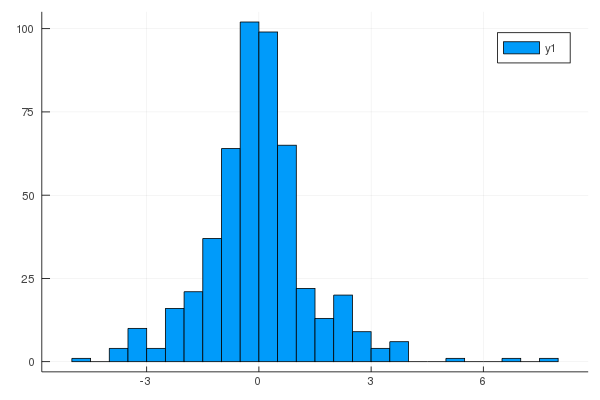

In [19]:
using Distributions

function plothistogram(distribution,n)
    ϵ=rand(distribution,n) # n draws from distribution
    histogram(ϵ)
end

lp=Laplace()
plothistogram(lp,500)

## A Mystery

"rand(n)" returns n uniform random variables on $[0,1)$.

In [20]:
rand(3)

3-element Array{Float64,1}:
 0.621909504534724
 0.4739845858465146
 0.06019967520219094

**"distribution"** points to a data type representing the Laplace distribution that has been defined in a third party package. c.f.**multiple dispatch**. Julia uses to implement **generic programming**. Functions in Julia can have different behavior depending on the particular arguments that they are passed.

# Example: Variations on Fixed Points

## Fixed Points Maps

We wich to solve for $v=p+{\beta}v$, equivalently, $v=p/(1-\beta)$. Now define $f(v):=p+{\beta}v$ .

## While Loops

Start with an initial value and iterate the map

$v^{n+1}=f(v^{n})$

For this exact "**f**" function, when $|\beta|<1$, we can see the convergence to $v=p/(1-\beta)$ by iterating backwards and taking $n{\rightarrow}\infty$ .

$v^{n+1}=p+{\beta}v^{n}=p+{\beta}p+{\beta}^2v^{n-1}=p{\sum_{i=0}^{n-1}}{\beta}^i+{\beta}^nv_0$

* **while** loop

In [21]:
# poor style
p = 1.0 # note 1.0 rather than 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition

# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + β * v_old # the f(v) map
    normdiff = norm(v_new - v_old)

    # replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


**"norm"** function to compare the values. **"println"** splices the value of an expression or variable prefixed by $ into a string.

* "**for**" loop

In [22]:
# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
for i in 1:maxiter
    v_new = p + β * v_old # the f(v) map
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance # check convergence
        iter = i
        break # converged, exit loop
    end
    # replace and continue
    v_old = v_new
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231, and |f(x) - x| = 9.181037796679448e-8 in 154 iterations


"**break**"

## Using a Function

Make it reusable by using a function.

In [23]:
# better, but still poor style
function v_fp(β, ρ, v_iv, tolerance, maxiter)
    # setup the algorithm
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old # the f(v) map
        normdiff = norm(v_new - v_old)

        # replace and continue
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter) # returns a tuple
end

# some values
p = 1.0 # note 1.0 rather than 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = v_fp(β, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


## Passing a Function

The above approach is still specific to the functional form in the problem "p+$\beta*$v_old". A key feature of Julia is the ability to efficiently handle functions passed to other functions.

Key steps are to define a function of a function "f" and to use the passed in map as a running variable.

In [24]:
# better style
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


## Named Arguments and Return Values (Recommended)

We should name function parameters and return values to avoid to order the settings or rutn types wrong.

In this example, all function parameters after the ";" in the list, must be called by name.

The return type of the function also has named fields, value, normdiff, and iter – all accessed intuitively using ".".

In [25]:
# good style
function fixedpointmap(f; iv, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

Fixed point = 9.999999918629035, and |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [27]:
r = 2.0
f(x) = r * x * (1 - x)

sol = fixedpointmap(f, iv=0.8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968, and |f(x) - x| = 3.979330237546819e-8 in 7 iterations


## Using a Package (best)

Avoid writing code altogether. Use the "fixedpoint" function from the "NLsolve.jl" library.

In [29]:
# best style
using NLsolve

p = 1.0
β = 0.9
f(v) = p .+ β * v # broadcast the +
sol = fixedpoint(f, [0.8])
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

┌ Info: Precompiling NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1260


Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


* Use an **anonymous** function

v -> p.\beta*v

In [30]:
# best style
p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


## Composing Packages

**Need to review**

This is a key benefit of using Julia.

As an example, consider if we want to solve the model with a higher-precision, as floating points cannot be distinguished beyond the machine epsilon for that type (recall that computers approximate real numbers to the nearest binary of a given precision; the machine epsilon is the smallest nonzero magnitude).

In [31]:
eps()

2.220446049250313e-16

In [32]:
# use arbitrary precision floating points
p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # higher precision

# otherwise identical
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155], and |f(x) - x| = 0.0 in 3 iterations


## Multivariate Fixed Point Maps

Easy to extend to multivariate maps.

In [33]:
p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]
f(v) = p .+ β * v # note that p and β are used in the function!

sol = fixedpointmap(f, iv = iv, tolerance = 1.0E-8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
"iterations")

Fixed point = [9.999999961080519, 19.999999923853192], and |f(x) - x| = 9.501826248250528e-9 in 184iterations


Using the "fixedpoint" library function

In [34]:
using NLsolve

p = [1.0, 2.0, 0.1]
β = 0.9
iv =[0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999998, 20.0, 1.0], and |f(x) - x| = 0.0 in 3 iterations


* **StaticArrays.jl** type

In [35]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999998, 20.0, 1.0], and |f(x) - x| = 0.0 in 3 iterations


All macros in Julia are prefixed by **@** in the name.

# Excercises

## Exercise 1: factorial

In [37]:
factorial(10)

3628800

* My first attempt

In [39]:
function factorial2(n)
    v_iv=1
    for i in 1:n
        v_new=v_iv*i
        i=i+1
        v_iv=v_new
    end
    return(v_iv)
end
sol=factorial2(10)
println("The factorial of $n is $sol")        
        

The factorial of 100 is 3628800


* Solution

In [40]:
function factorial2(n)
    k = 1
    for i in 1:n
        k *= i  # or k = k * i
    end
    return k
end

factorial2(4)

24

Note: k*=i is equivalent to k=k times i. v_new is unnessesary. i=i+1 is not needed in "for" loop.

In [42]:
function factorial2(n)
    v=1
    for i in 1:n
        v*=i
    end
    return(v)
end
sol=factorial2(10)
println("The factorial of $n is $sol")        
        

The factorial of 100 is 3628800


## Exercise 2: Draw from binomial distribution

In [76]:
function binomial_rv(;n,p)
    U=rand(n)
    y=zeros(n)
    for i in eachindex(U)
        y[i]=U[i]<p
    end
      Y=sum(y)    
    return Y
end
BN=binomial_rv(n=1000,p=0.4)


381.0

* Solution

In [111]:
function binomial_rv2(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count += 1 # or count = count + 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv2(10, 0.5)
    print("$b, ")
end

4, 4, 5, 4, 6, 6, 8, 6, 4, 4, 6, 4, 4, 5, 5, 4, 5, 6, 7, 3, 3, 5, 5, 8, 5, 

Modify my function to enable it to draw from the distribution.

In [79]:
function binomial_rv(;n,p)
    U=rand(n)
    y=zeros(n)
    for i in eachindex(U)
        y[i]=U[i]<p
    end
      Y=sum(y)    
    return Y
end

for j in 1:25
    b = binomial_rv(n=10,p=0.5)
    print("$b,")
end


3.0,5.0,3.0,7.0,4.0,5.0,6.0,7.0,4.0,4.0,6.0,6.0,5.0,6.0,5.0,4.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,5.0,6.0,

**How can I display the output as am integer ?**

## Exercise 3: Approximate $\pi$

In [106]:
p=0
n=100000
for j in 1:n
    x=(rand(),rand())
    if sqrt((x[1]-0.5)^2+(x[2]-0.5)^2)<0.5
        p+= 1
    end
end
area=p/n
apx=area/0.5^2
print("π is qpproximately equal to $apx when $n times randomly drawing.")

π is qpproximately equal to 3.14584 when 100000 times randomly drawing.

Why "count" cannot be used here?

* Solution

In [112]:
n = 1000000
count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # distance from middle of square
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

ErrorException: cannot assign a value to variable Base.count from module Main

**Unsloved "*cannot assign a value to variable Base.count from module Main*"**

Straightforward to write "x=rand(2)"

## Exercise 4: ternary operator

In [143]:
n = 10
h = 0
r = 0
for i in 1:n
    x=rand()
    if x<0.5
        h+=1
        if h>=3
            r=1
        end
    else
        h=0
    end
end
println("The payoff is $r dollar")     

The payoff is 1 dollar


* Solution

In [148]:
payoff = 0
c = 0
print("Count =")
for i in 1:10
    U = rand()
    if U < 0.5
        c += 1
    else
        c = 0
    end
    print(c)
    if c == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count =1010000001
payoff = 0


* ternary operator

In [150]:
a = 1  < 2 ? "foo" : "bar"

"foo"

In [151]:
a = 1 > 2 ? "foo" : "bar"

"bar"

In [153]:
payoff = 0.0
c = 0

print("Count = ")

for i in 1:10
    U = rand()
    c = U < 0.5 ? c + 1 : 0
    print(c)
    if c == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 1010101001
payoff = 0.0


Takeaway
* "\n" generates new line of the printed window.
* Put print("*iterated outcome*=") before the loop and print("variable") inside the loop.
* A ternary operator specifies the output when the condition is true or false.

Note on ternary operators: syntax: space required after colon in "?" expression

* Revised

In [162]:
n = 10
h = 0
print("Outcome = ")
r = 0
for i in 1:n
    x=rand()
    h = x < 0.5 ? h+1 : 0
    print(h)
        if h==3
            r=1
        end
end
println("\nThe payoff is $r dollar")     

Outcome = 0012000123
The payoff is 1 dollar


## Exercise 5: plotting AR(1) process

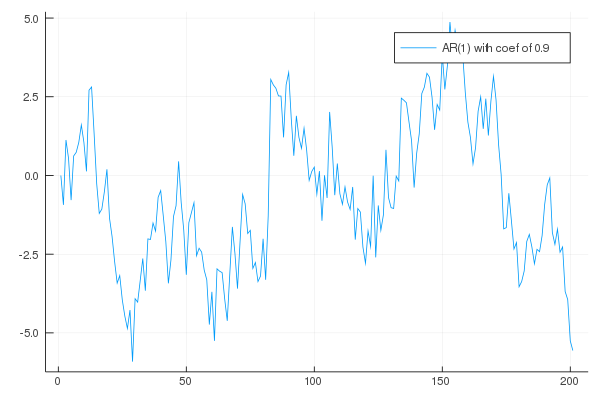

In [165]:
using Plots
gr(fmt=:png)

α=0.9
n=200
x=zeros(n+1)
for i in 1:n
    ϵ=randn()
    x[i+1]=α*x[i]+ϵ
end
plot(x,label="AR(1) with coef of 0.9")

* Solution

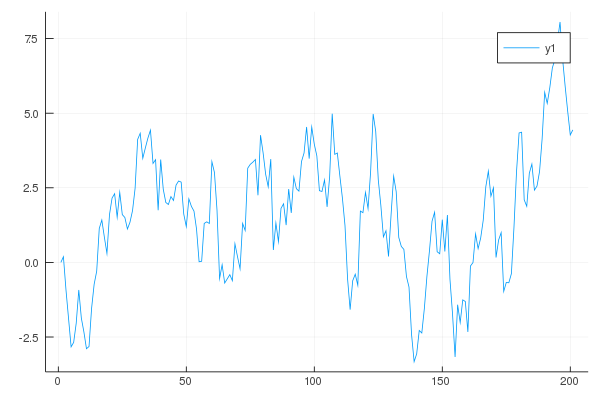

In [164]:
using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks
α = 0.9
n = 200
x = zeros(n + 1)

for t in 1:n
    x[t+1] = α * x[t] + randn()
end
plot(x)

* Takeaway

Can directly put randn() in the equation.

## Exercise 6

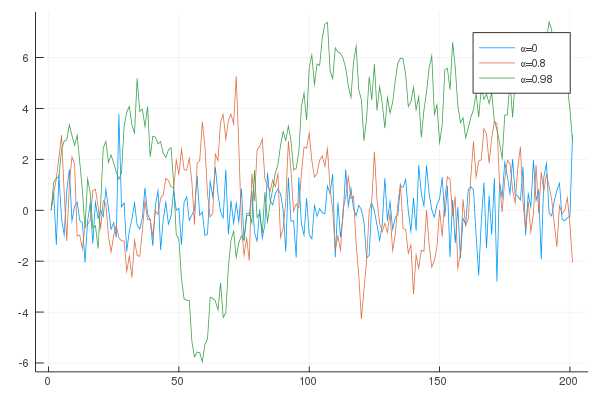

In [174]:
using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks

n = 200
x= zeros(n + 1)
function ar(α)
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
return (x)
end
plot(ar.(0),label="α=0")
plot!(ar.(0.8),label="α=0.8")
plot!(ar.(0.98),label="α=0.98")

* Solution

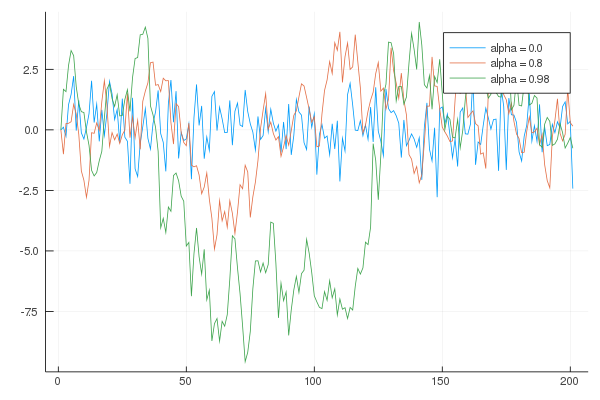

In [175]:
αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to

for α in αs
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
    plot!(p, x, label = "alpha = $α") # add to plot p
end
p # display plot

* Takeaway


* vectorize for multivariate case
* Define an empty plot to use loop.
* Use of "for loop": for x in xs => do same operation for each element of xs

## Exercise 7

In [181]:
α=1
σ=0.2
function firstpassage(threshold; maxdraws=200)
    for i in 1:maxdraws
        val = rand()
        if val < threshold # checks threshold
            return i # leaves function, returning draw number
        end
    end
    return Inf # if here, reached maxdraws
end

draws = drawsuntilthreshold(0.2, maxdraws=100)

11

In [184]:
vals = zeros(0) # empty vector

for i in 1:100
    val = rand()
    if val < 0.5
        push!(vals, val)
    end
end
println("There were $(length(vals)) below 0.5")

There were 43 below 0.5


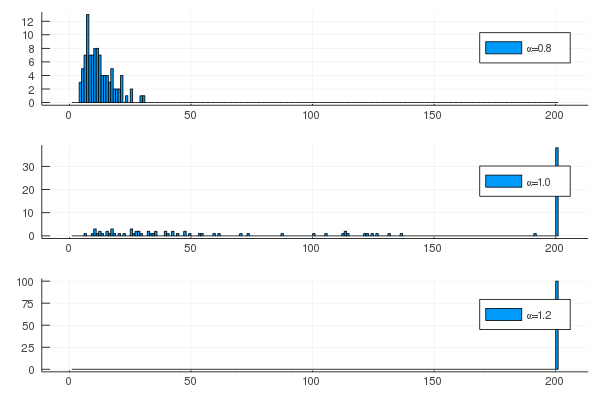

In [268]:
s=100
n=200
σ=0.2
function arhistogram(α)
    fpt=zeros(s)
    for m in 1:s
        x = zeros(n + 1)
        x[1] = 1
        neg=zeros(0)
        for t in 1:n
        x[t+1] = α * x[t] + σ*randn()
            if x[t+1]<0
            push!(neg,t+1)
            end
        end
    push!(neg,n)
    fpt[m]=neg[1]
    end
    return histogram(fpt,label="α=$α",bins=1:201)
end
plot(arhistogram(0.8),arhistogram(1.0),arhistogram(1.2),layout=(3,1))


Could be better.